## Advertising EDA

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score


%matplotlib inline


### Load the data

In [2]:
#Read in files and print the information
train_data_df = pd.read_csv('D:/Data Science Dream Job/Project/Data/advertising.csv')

### Examine the Data

In [3]:
train_data_df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
train_data_df.tail(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
990,35.79,44,33813.08,165.62,Enterprise-wide tangible model,North Katie,1,Tonga,2016-04-20 13:36:42,1
991,38.96,38,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,2016-07-21 16:02:40,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,2016-03-06 11:36:06,1
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,2016-02-11 23:45:01,0
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


### Using .info() to see lengths and datatypes

In [5]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


### Checking for duplicates

In [6]:
train_data_df.duplicated().sum()

0

In [7]:
train_data_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Checking for Null Values

In [8]:
train_data_df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Identify numerical and categorical variables

In [9]:
train_data_df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [10]:
train_data_df = train_data_df.rename(index=str, columns={"Daily Time Spent on Site": "Daily_Time_Spent_on_Site", "Area Income": "Area_Income", "Daily Internet Usage": "Daily Internet Usage"
                                        ,"Daily Internet Usage":"Daily_Internet_Usage","Ad Topic Line": "Ad_Topic_Line", "Clicked on Ad": "Clicked_on_Ad",})

### Summarizing the numerical and categorical variables

In [11]:
train_data_df.describe(include = [np.number])

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [12]:
train_data_df.describe(include = ['O'])

,Ad_Topic_Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Digitized disintermediate ability,Lisamouth,France,2016-03-31 20:55:22
freq,1,3,9,1


###### Variables with High Cardinality to watch out for
* Ad_Topic_Line
* City
* Country

In [13]:
numeric_cols = ['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage','Male','Clicked_on_Ad']

In [14]:
categorical_cols = ['Ad_Topic_Line', 'City','Country','Timestamp']
categorical_cols.remove('Timestamp')
print(categorical_cols)

['Ad_Topic_Line', 'City', 'Country']


In [15]:
train_data_df['Timestamp'] = pd.to_datetime(train_data_df['Timestamp'])
train_data_df['Year'] = train_data_df['Timestamp'].dt.year
train_data_df['Month'] = train_data_df['Timestamp'].dt.month
train_data_df['Day'] = train_data_df['Timestamp'].dt.day
train_data_df['time'] = train_data_df['Timestamp'].dt.time

In [16]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
Daily_Time_Spent_on_Site    1000 non-null float64
Age                         1000 non-null int64
Area_Income                 1000 non-null float64
Daily_Internet_Usage        1000 non-null float64
Ad_Topic_Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null datetime64[ns]
Clicked_on_Ad               1000 non-null int64
Year                        1000 non-null int64
Month                       1000 non-null int64
Day                         1000 non-null int64
time                        1000 non-null object
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 117.2+ KB


In [17]:
train_data_df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad,Year,Month,Day,time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3,03:36:18


In [18]:
train_data_df.groupby(["Clicked_on_Ad"]).mean()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Year,Month,Day
Clicked_on_Ad,,,,,,,,
0,76.85462,31.684,61385.58642,214.51374,0.500,2016.0,3.786,15.530
1,53.14578,40.334,48614.41374,145.48646,0.462,2016.0,3.848,15.438


People who clicked on the Ad where older(40 and older), spent higher amount of time on the site, had lower income and had lesser daily internet usage at an average lesser

In [19]:
train_data_df.groupby(['Country','Clicked_on_Ad'])['Age'].mean()

Country                                       Clicked_on_Ad
Afghanistan                                   0                35.333333
                                              1                46.200000
Albania                                       0                28.000000
                                              1                33.000000
Algeria                                       0                29.333333
                                              1                30.666667
American Samoa                                0                25.500000
                                              1                44.333333
Andorra                                       1                30.000000
Angola                                        0                28.333333
                                              1                41.000000
Anguilla                                      0                36.000000
                                              1                4

This shows that higher aged people clicked on Ads across all countries.

In [20]:
# Dropping the Timestamp columns 
train_data_df = train_data_df.drop(['Timestamp'], axis= 1)
train_data_df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,Year,Month,Day,time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016,3,27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016,4,4,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016,3,13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016,1,10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016,6,3,03:36:18


In [21]:
# Replacing the categorical values with dummy variables
train_data_df = pd.concat([train_data_df, pd.get_dummies(train_data_df['Ad_Topic_Line'], prefix='Ad_Topic_Line')],axis=1)
train_data_df = pd.concat([train_data_df, pd.get_dummies(train_data_df['City'], prefix='City')],axis=1)
train_data_df = pd.concat([train_data_df, pd.get_dummies(train_data_df['Country'], prefix='Country')],axis=1)


In [22]:
train_data_df1 = train_data_df.copy()
#Dropping the dummied variables
train_data_df1 = train_data_df1.drop(['Country', 'Ad_Topic_Line', 'City','Year', 'Day', 'Month','time'],axis=1)
train_data_df1.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,Ad_Topic_Line_Adaptive 24hour Graphic Interface,Ad_Topic_Line_Adaptive asynchronous attitude,Ad_Topic_Line_Adaptive context-sensitive application,Ad_Topic_Line_Adaptive contextually-based methodology,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Select dependent variable and prediction outcome from the data
train_data_df_final_vars = train_data_df1.columns.values.tolist()
y = train_data_df1["Clicked_on_Ad"]

X_features = [i for i in train_data_df_final_vars if i not in y]
X = train_data_df1[X_features]

#Split the dataset into training and test data
train_X,test_X,train_y,test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Implementing the LogisticRegression model

In [28]:
log_reg = LogisticRegression()
log_reg.fit(train_X,train_y)

y_pred = log_reg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(log_reg.score(test_X, test_y)))

Accuracy of logistic regression classifier on test set: 0.920


### Cross-validation


In [31]:
kfold = model_selection.KFold(n_splits=10, random_state=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_X, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.918


The average accuracy remains very close to the Logistic Regression model accuracy; we can conclude that our model generalizes well in the test set.

### Look at different performance evaluation metrics in testing data set：confusion matrix, ROC, precision, recall, and f1-score

In [34]:
# Looking at different performance evaluation metrics in testing data set：confusion matrix, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from time import time

def evaluation(estimator, X_test, y_test):

    start = time()
    y_pred = estimator.predict(X_test)
    print("Querying with the best model took %f seconds." % (time() - start))
    print(len(y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
    print('ROC AUC: %.3f' % roc_auc_score(y_true=y_test, y_score=y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
    print('-----------------------------------------')
    print(metrics.classification_report(y_test, y_pred))

Querying with the best model took 0.007406 seconds.
200
[[102   6]
 [ 10  82]]


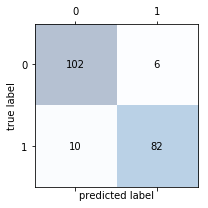

Precision: 0.932
Recall: 0.891
F1: 0.911
ROC AUC: 0.918
Accuracy: 0.920
-----------------------------------------
             precision    recall  f1-score   support

          0       0.91      0.94      0.93       108
          1       0.93      0.89      0.91        92

avg / total       0.92      0.92      0.92       200



In [46]:
evaluation(log_reg, test_X, test_y)

The marketing campaign for which you spend 1000 per potential customer. For each customer that you target with your ad campaign and that clicks on the ad, let's assume that you'll get an overall profit of 100 (earn back 1100 per correct target). However, if you target a customer that ends up not clicking on your ad, then you get a net loss of 1050.

In [53]:
profit_of_campaign = 82 * 100 - 6 * 50 + 10 * 100
print('Money made = ${}'.format(profit_of_campaign))

Money made = $8900
